In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap

plt.rcParams.update({'font.size': 16})



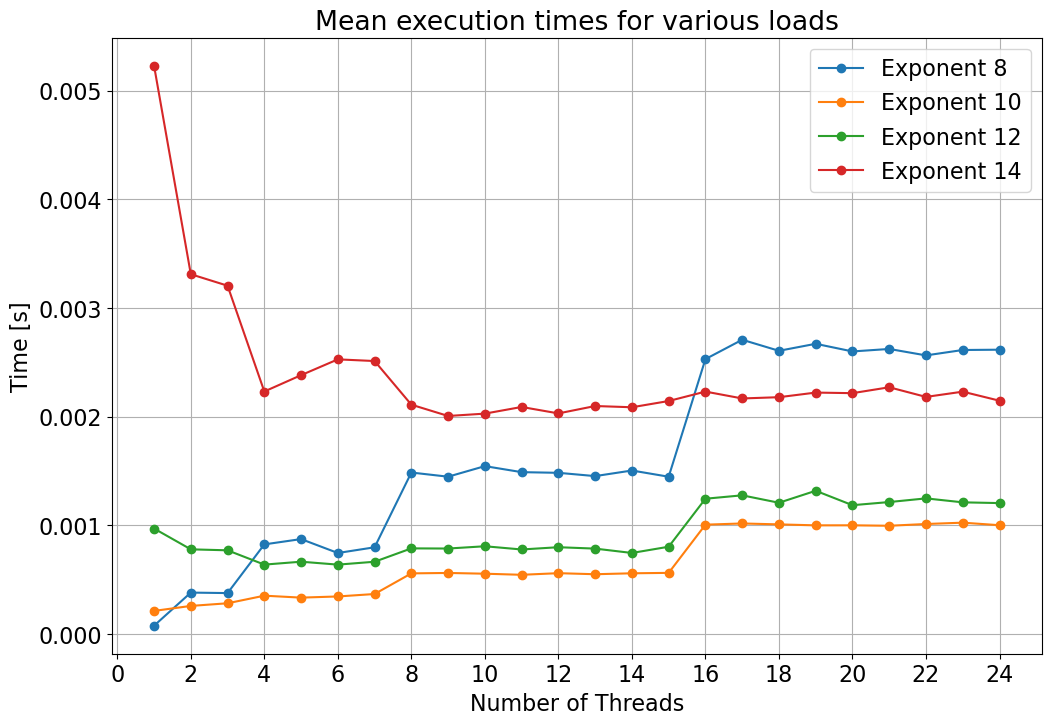

In [84]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize an empty dictionary to store data
data = {}

dirs = os.listdir(base_dir)
dirs = [int(dir) for dir in dirs]
dirs.sort()

#initialize the plot
plt.figure(figsize=(12, 8))

# Loop through directories 
for i in range(8, 16, 2):
    data.clear()  # Clear data dictionary for each iteration

    #open the thread directory
    for dir in dirs:
        #iterate for i.txt
        file_path = os.path.join(base_dir, str(dir), fr"{i}.txt")
        with open(file_path, 'r') as f:
            lines = f.readlines()
            tot = 0
            for line in lines:
                tot += float(line)
            mean = tot / len(lines)

            # Append the mean value and thread count (assuming thread count is in the directory name)
            data[dir] = mean

    x, y = [], []

    # Loop through directories and their data
    for key, value in data.items():
        x.append(int(key))
        y.append(value)
    
    # Plot the data for this directory with a unique label
    plt.plot(x, y, label=f"Exponent {i}", marker='o')

# Set labels and title
plt.xlabel("Number of Threads")
plt.ylabel("Time [s]")
plt.title("Mean execution times for various loads")

# Add legend
plt.legend()

plt.gca().xaxis.set_major_locator(MultipleLocator(2))  # Set major ticks at every multiple of 2

# Show the plot
plt.grid(True)
plt.savefig('small_arrays_execution.png')
plt.show()


In [78]:
def getDataToPlot(mode):
    base_dir = os.path.join('..', 'results', mode)

    # Initialize an empty dictionary to store data
    
    data = {}
    dirs = os.listdir(base_dir)
    dirs = [int(dir) for dir in dirs]

    dirs.sort()

    #open the thread directory
    for dir in dirs:
            #iterate for i.txt
    
        with open(f'{base_dir}/{dir}/{24}.txt', 'r') as f:
            lines = f.readlines()
            tot = 0
            for line in lines:
                tot += float(line)
            mean = tot / len(lines)
                #print(dir, mean)
    
                # Append the mean value and thread count (assuming thread count is in the directory name)
            data[dir] = mean
        # Sort the data by thread count
        #data = sorted(data(data.items(), key=lambda item: item[1]))
    print(data)
    x,y = [], []
    
        # Loop through directories and their data
    for key, value in data.items():
        #print( value)
        x.append(int(key))
        y.append(value)
    
    return x, y


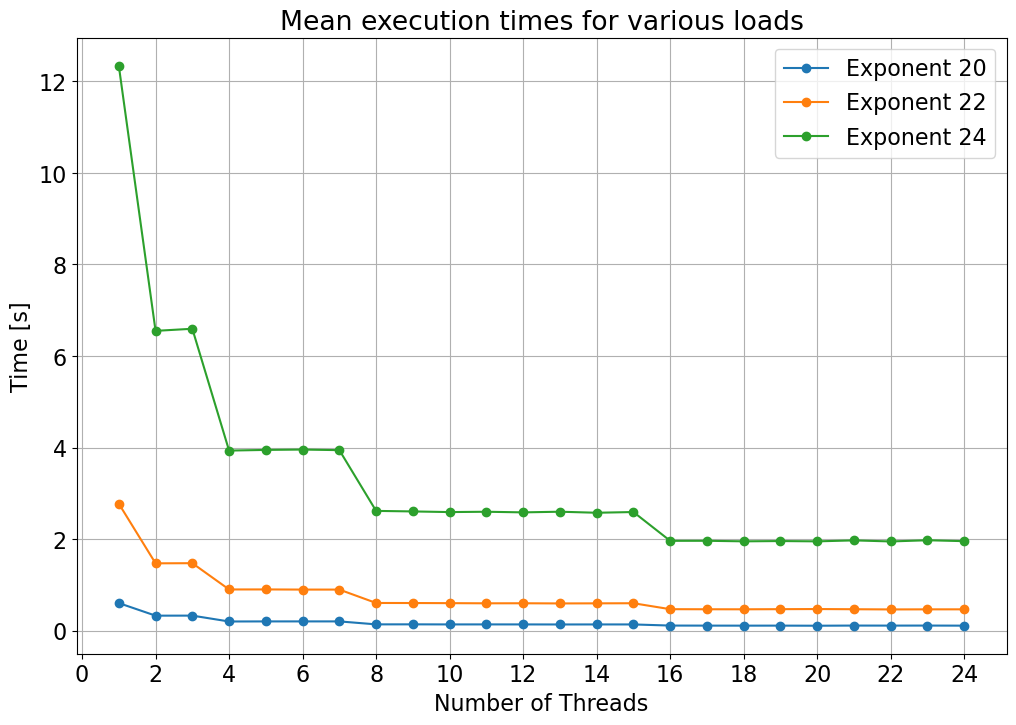

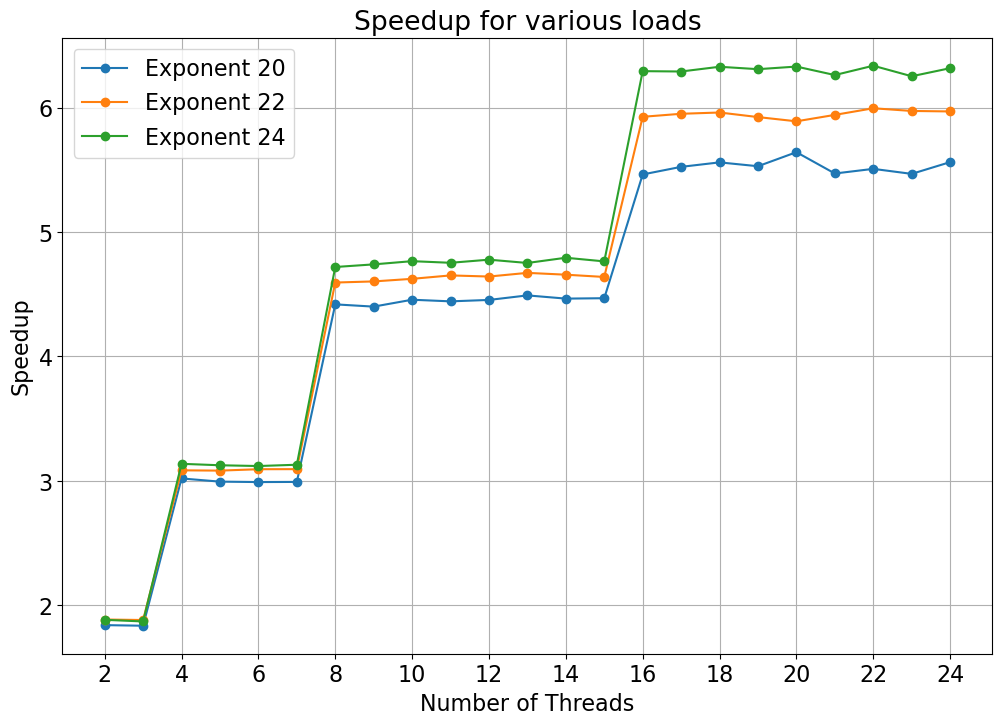

In [82]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize the figure for execution time
plt.figure(figsize=(12, 8))

dirs = os.listdir(base_dir)
dirs = [int(dir) for dir in dirs]
dirs.sort()

# Plot mean execution times for each exponent
for i in range(20, 25, 2):
    data = {}  # Initialize data dictionary for each iteration

    for dir in dirs:
        file_path = os.path.join(base_dir, str(dir), fr"{i}.txt")
        with open(file_path, 'r') as f:
            lines = f.readlines()
            tot = sum(float(line) for line in lines)
            mean = tot / len(lines)
            data[dir] = mean

    x, y = [], []

    for key, value in data.items():
        x.append(int(key))
        y.append(value)

    # Plot mean execution time
    plt.plot(x, y, label=f"Exponent {i}", marker='o')

# Set labels and title for execution time plot
plt.xlabel("Number of Threads")
plt.ylabel("Time [s]")
plt.title("Mean execution times for various loads")
plt.legend()
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True)
plt.savefig('big_arrays_execution.png')
plt.show()

# Initialize the figure for speedup
plt.figure(figsize=(12, 8))

# Plot speedup for each exponent
for i in range(20, 25, 2):
    speedup = []  # Initialize speedup list for each iteration

    for dir in dirs:
        
        file_path = os.path.join(base_dir, str(dir), fr"{i}.txt")
        with open(file_path, 'r') as f:
            lines = f.readlines()
            mean = sum(float(line) for line in lines) / len(lines)
            if dir == 1:
                speedup.append(mean)
            else:
                speedup.append(speedup[0] / mean)

    # Plot speedup for this exponent
    plt.plot(x[1:], speedup[1:], label=f"Exponent {i}", marker='o')

# Set labels and title for speedup plot
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("Speedup for various loads")
plt.legend()
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True)
plt.savefig('big_arrays_speedup.png')
plt.show()


{1: 12.34345, 2: 6.5496246666666655, 3: 6.595829, 4: 3.9337173333333335, 5: 3.948359333333334, 6: 3.9561479999999998, 7: 3.9429923333333337, 8: 2.615680666666667, 9: 2.6040609999999993, 10: 2.589952333333333, 11: 2.5970903333333335, 12: 2.5834610000000002, 13: 2.5978660000000016, 14: 2.575131666666666, 15: 2.5909526666666665, 16: 1.9616390000000004, 17: 1.9625186666666659, 18: 1.9507240000000003, 19: 1.9567196666666666, 20: 1.9502166666666667, 21: 1.9714710000000002, 22: 1.9481396666666664, 23: 1.9744976666666665, 24: 1.954252}
{1: 3.314522666666668, 2: 1.7758553333333331, 3: 1.7718963333333335, 4: 1.0649720000000003, 5: 1.0634163333333335, 6: 1.064205666666667, 7: 1.0642306666666665, 8: 0.7236690666666665, 9: 0.7241191333333332, 10: 0.7205444, 11: 0.7247214, 12: 0.7235838333333334, 13: 0.7270527999999998, 14: 0.7231493333333331, 15: 0.7266258666666668, 16: 0.6343714666666667, 17: 0.6363880000000001, 18: 0.6344122, 19: 0.6406812666666667, 20: 0.6363717999999999, 21: 0.6381294999999999,

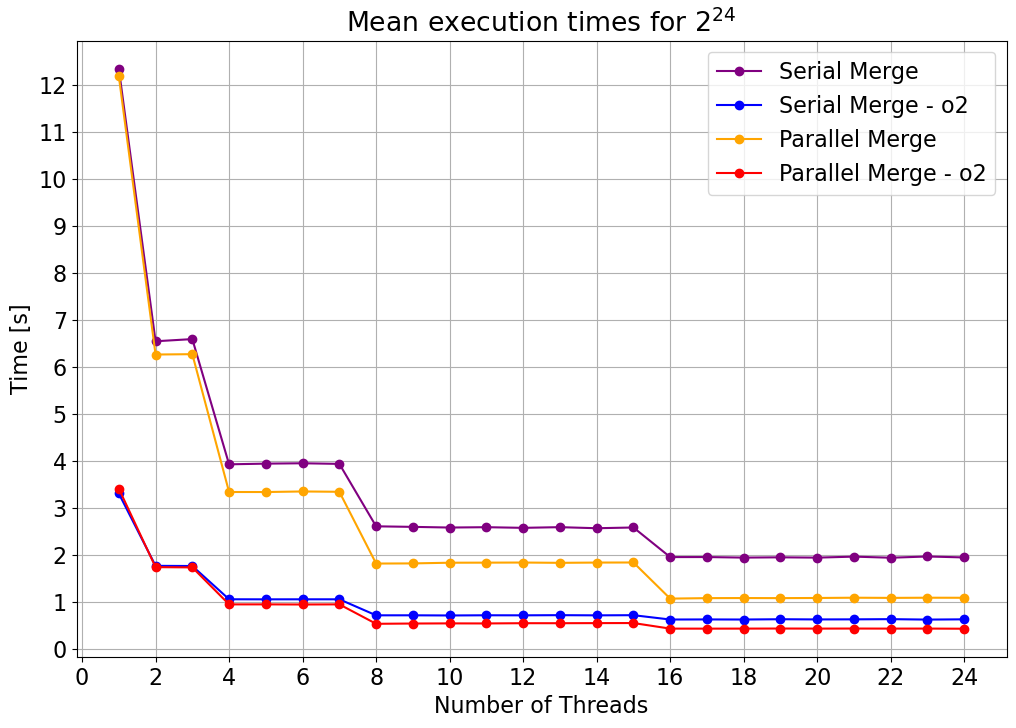

In [83]:
import os
import matplotlib.pyplot as plt

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize the plot
plt.figure(figsize=(12, 8))

#data for par
x, y = getDataToPlot('par')
plt.plot(x, y, label=f"Serial Merge", marker='o', color='purple',)

#data for parO2
x, y = getDataToPlot('parO2')
plt.plot(x, y, label=f"Serial Merge - o2", marker='o', color='blue')

#data for parM
x, y = getDataToPlot('parM')
plt.plot(x, y, label=f"Parallel Merge", marker='o', color='orange')

#data for parMO2
x, y = getDataToPlot('parMO2')
plt.plot(x, y, label=f"Parallel Merge - o2", marker='o', color='red')

plt.title("Mean execution times for $2^{24}$")
# Add legend
plt.legend()

plt.xlabel("Number of Threads")
plt.ylabel("Time [s]")


# Show the plot
plt.grid(True)
plt.yticks(np.arange(0, 13, 1))
plt.xticks(np.arange(0, 25, 2))
plt.savefig('optimized_execution_time.png')
plt.show()

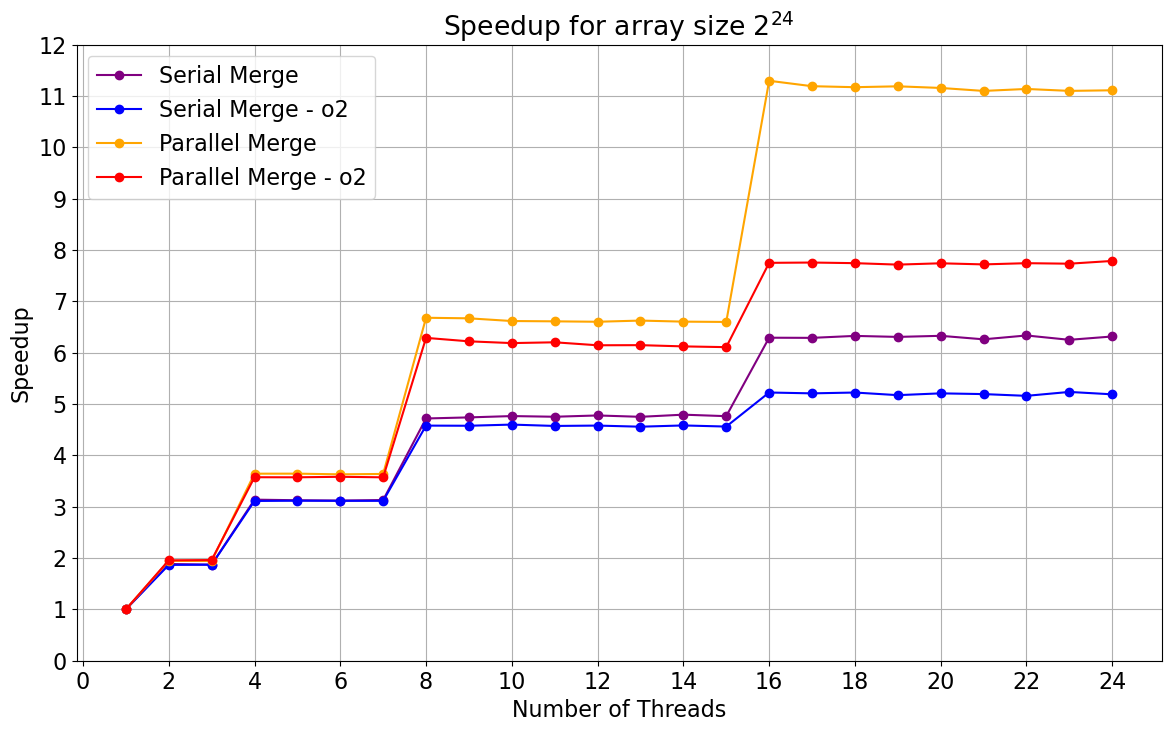

In [85]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')


def getRefValue(base_dir):
    with open(f'{base_dir}/1/24.txt', 'r') as f:
        lines = f.readlines()
        tot = 0
        for line in lines:
            tot += float(line)
        mean = tot / len(lines)

    return mean



def plot_speedup(base_dir_prefix="par"):
    """
    Plots speedup data for directories with a specified prefix.

    Args:
        base_dir_prefix (str, optional): Prefix for directory names containing speedup data.
            Defaults to "par".
    """

    plt.figure(figsize=(14, 8))

    # Initialize empty lists for data
    x, y = [], []

    labels = ["Serial Merge", "Serial Merge - o2", "Parallel Merge", "Parallel Merge - o2"]
    colors = ["purple", "blue", "orange", "red"]
    i = 0

    for dir_name in ["par", "parO2", "parM", "parMO2"]:
        full_dir = os.path.join('..', 'results', dir_name)
        mean = getRefValue(full_dir)  # Reuse existing function

        # Process data for current directory
        data = {}
        dirs = [int(dir) for dir in os.listdir(full_dir)]
        dirs.sort()

        for dir in dirs:
            file_path = os.path.join(full_dir, str(dir), '24.txt')
            with open(file_path, 'r') as f:
                lines = f.readlines()
                tot = 0
                for line in lines:
                    tot += float(line)
            m = tot / len(lines)
            speedup = mean / m
            data[dir] = speedup

        # Append data to main lists
        for key, value in data.items():
            x.append(int(key))
            y.append(value)

        # Plot the data for this directory with a unique label
        plt.plot(x, y, label=labels[i], marker='o', color = colors[i])
        i+=1

        # Clear data lists for next iteration
        x, y = [], []  # Reset for next directory

    # Set labels and title (unchanged)
    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.title("Speedup for array size $2^{24}$")
    plt.legend()

    plt.grid(True)
    plt.yticks(np.arange(0, 13, 1))
    plt.xticks(np.arange(0, 25, 2))
    plt.savefig('optimized_speedup.png')  # Save the plot
    plt.show()



plot_speedup()